In [1]:
from notebooks.standardImports import *
import random as rn

# Displaced Vacuum

In [2]:
vacuumState = qt.basis(20, 0)
alphaReal = 1.5*rn.random()
alphaImag = 1.5*rn.random()
theta1 = 2*np.pi*rn.random()
alpha = (alphaReal+(alphaImag*1j))*(np.e**(theta1*1j))
displacementOp = qt.displacement(alpha, 20)
displacedVacuum = displacementOp @ vacuumState

In [3]:
phaseSpace = np.arange(-4, 4.1, 0.1)
wignerFunc = qt.Wigner(displacedVacuum, phaseSpace)

In [4]:
nPopulation = lambda n : abs(((np.e**(-(abs(alpha)**2)/2))*((alpha**n)/(np.sqrt(np.math.factorial(n))))))**2
nPopCalc = lambda n : abs(qt.innerProd(displacedVacuum, qt.basis(20, n)))**2

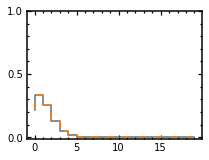

In [5]:
fig, ax = plt.subplots(figsize=cm2inch(8, 6))

ax.step([i for i in range(20)], [nPopulation(n) for n in range(20)])
ax.step([i for i in range(20)], [nPopCalc(n) for n in range(20)], '-.')

#ax.set_xticks([0.0, 0.5, 1.0, 1.5, 2.0])
ax.set_yticks([0, 0.5, 1])

ax.yaxis.set_minor_locator(tck.AutoMinorLocator())
ax.xaxis.set_minor_locator(tck.AutoMinorLocator())

ax.tick_params(direction='in', which='both')
ax.tick_params(bottom=True, top=True, left=True, right=True, which='both')

ax.tick_params(length=4, width=1.25)
ax.tick_params(length=2, width=1.25, which='minor')

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)

plt.show()

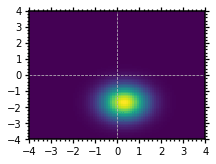

In [6]:
fig, ax = plt.subplots(figsize=cm2inch(8, 6))
x, y = np.meshgrid(phaseSpace, phaseSpace)
ax.pcolormesh(y, x, wignerFunc)
ax.plot(phaseSpace, [0 for i in phaseSpace], color='silver', linestyle="--", linewidth='0.75')
ax.plot([0 for i in phaseSpace], phaseSpace, color='silver', linestyle="--", linewidth='0.75')
#plt.arrow(0, 0, np.sqrt(2)*alpha.imag, np.sqrt(2)*alpha.real, width=0.02, head_width=0)

ax.set_xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
ax.set_yticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])

ax.yaxis.set_minor_locator(tck.AutoMinorLocator())
ax.xaxis.set_minor_locator(tck.AutoMinorLocator())

ax.tick_params(direction='out', which='both')
ax.tick_params(bottom=True, top=True, left=True, right=True, which='both')

ax.tick_params(length=4, width=1.25)
ax.tick_params(length=2, width=1.25, which='minor')

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)

plt.show()

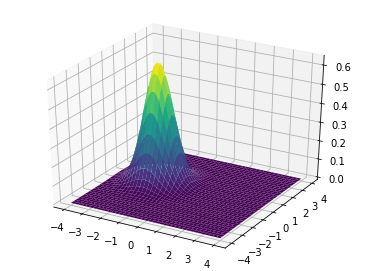

In [10]:
fig = plt.figure(figsize=cm2inch(16, 12))
ax = fig.add_subplot(111, projection='3d')
x, y = np.meshgrid(phaseSpace, phaseSpace)
ax.plot_surface(x, y, wignerFunc, cmap='viridis')
plt.show()